In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

### Data import

In [2]:
data = load_breast_cancer(as_frame=True)

### Data preparation

In [3]:
# (separate) X and y
X = data.data
y = data.target

In [4]:
# scale the data
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

### Performing PCA

##### As an alternative to feature selection, I performed PCA on the features and used the resulting principal components to train the same ML models for comparison.

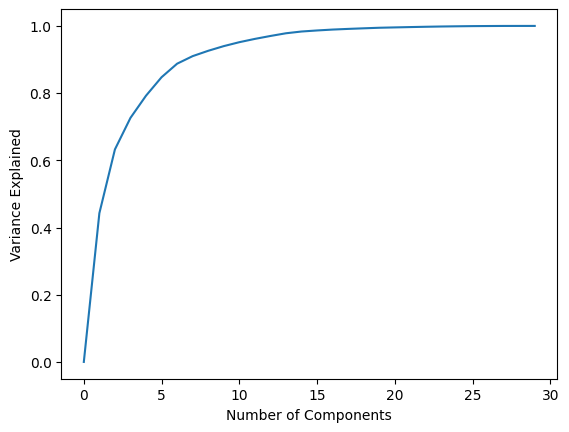

In [5]:
# the number of features
n_features = len(X.columns)

# create a function to plot how much total variance is explained by n features 
def check_explained_variance(X_sc, n_features):
    all_variances = []
    
    for n in range(n_features):
        pca = PCA(n_components=n)
        pca.fit(X_sc)
        
        all_variances.append(pca.explained_variance_ratio_.sum())
    
    # visualize the results
    plt.plot(range(n_features), all_variances)
    plt.xlabel("Number of Components")
    plt.ylabel("Variance Explained")

# use the above function
check_explained_variance(X_sc, n_features)

# save the figure
plt.savefig('variance_plot.jpg', bbox_inches='tight', dpi=300)

In [6]:
# for printing in color
def prRed(skk): print("\033[91m{}\033[00m" .format(skk))

In [7]:
# the number of components
n_comps = [4, 5, 6]

# calculate total variances 
for n in n_comps:
    pca = PCA(n_components=n, random_state=101)
    pca.fit(X_sc)
    prRed(f'Number of principal components: {n}')
    total_variance = pca.explained_variance_ratio_.sum()
    print(f'Total variance explained: {round(total_variance * 100, 2)} %')
    print('')

Number of principal components: 4
Total variance explained: 79.24 %

Number of principal components: 5
Total variance explained: 84.73 %

Number of principal components: 6
Total variance explained: 88.76 %



##### 4, 5 or 6 principal components represent the raw data in a relatively high degree (explained variance is about 75-90%), therefore it might be useful to compare the performance of ML models in these three scenarios.

<br>

In [8]:
# define a model with 3 components, mainly for visualization
PCA_model = PCA(n_components=3, random_state=101)

# fit the model
princ_components = PCA_model.fit_transform(X_sc)

# create a df with the results
df_PCA = pd.DataFrame(princ_components, columns=['PC1', 'PC2', 'PC3'])

In [9]:
df_PCA.head()

,PC1,PC2,PC3
0,9.192837,1.948582,-1.123173
1,2.387802,-3.768173,-0.529300
2,5.733896,-1.075174,-0.551743
3,7.122953,10.275588,-3.232796
4,3.935302,-1.948072,1.389765


In [10]:
# variance explained by the different principal components
variances = PCA_model.explained_variance_ratio_

# create a function to print the results
def variance_explained(variances):
    print('Variance explained by the different principal components:')
    for i in range(len(variances)):
        print(f'PC{i+1}: {round(variances[i] * 100, 2)} %')
    print('')
    print(f'Total variance explained by the {len(variances)} principal components:')
    print(f'{round(variances.sum() * 100, 2)} %')

# print the results
variance_explained(variances)

Variance explained by the different principal components:
PC1: 44.27 %
PC2: 18.97 %
PC3: 9.39 %

Total variance explained by the 3 principal components:
72.64 %


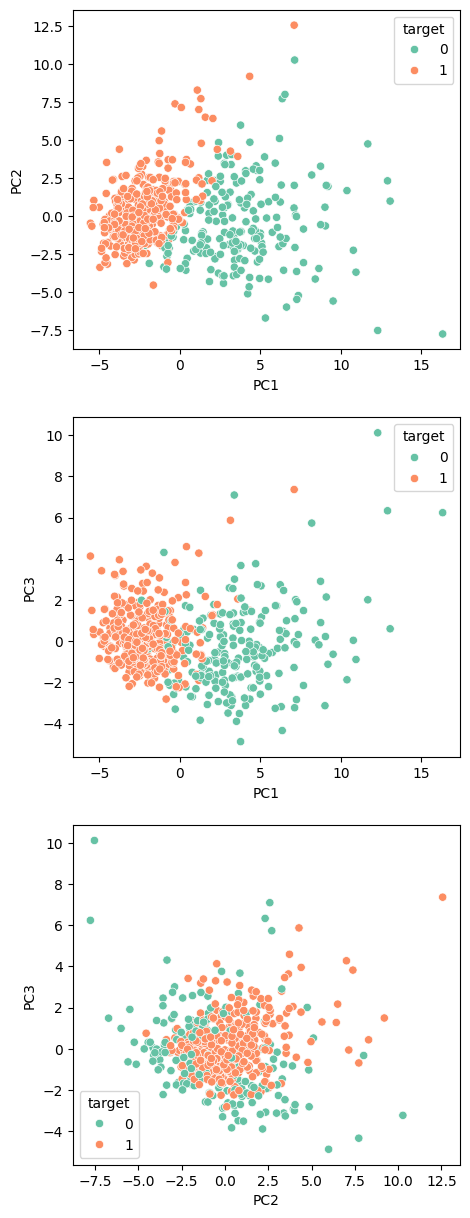

In [11]:
# visualize principal components 
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

sns.scatterplot(data=df_PCA, x='PC1', y='PC2', hue=y, palette='Set2', ax=ax[0])
sns.scatterplot(data=df_PCA, x='PC1', y='PC3', hue=y, palette='Set2', ax=ax[1])
sns.scatterplot(data=df_PCA, x='PC2', y='PC3', hue=y, palette='Set2', ax=ax[2])

# save the figure
plt.savefig('PCA_2D.jpg', bbox_inches='tight', dpi=300)

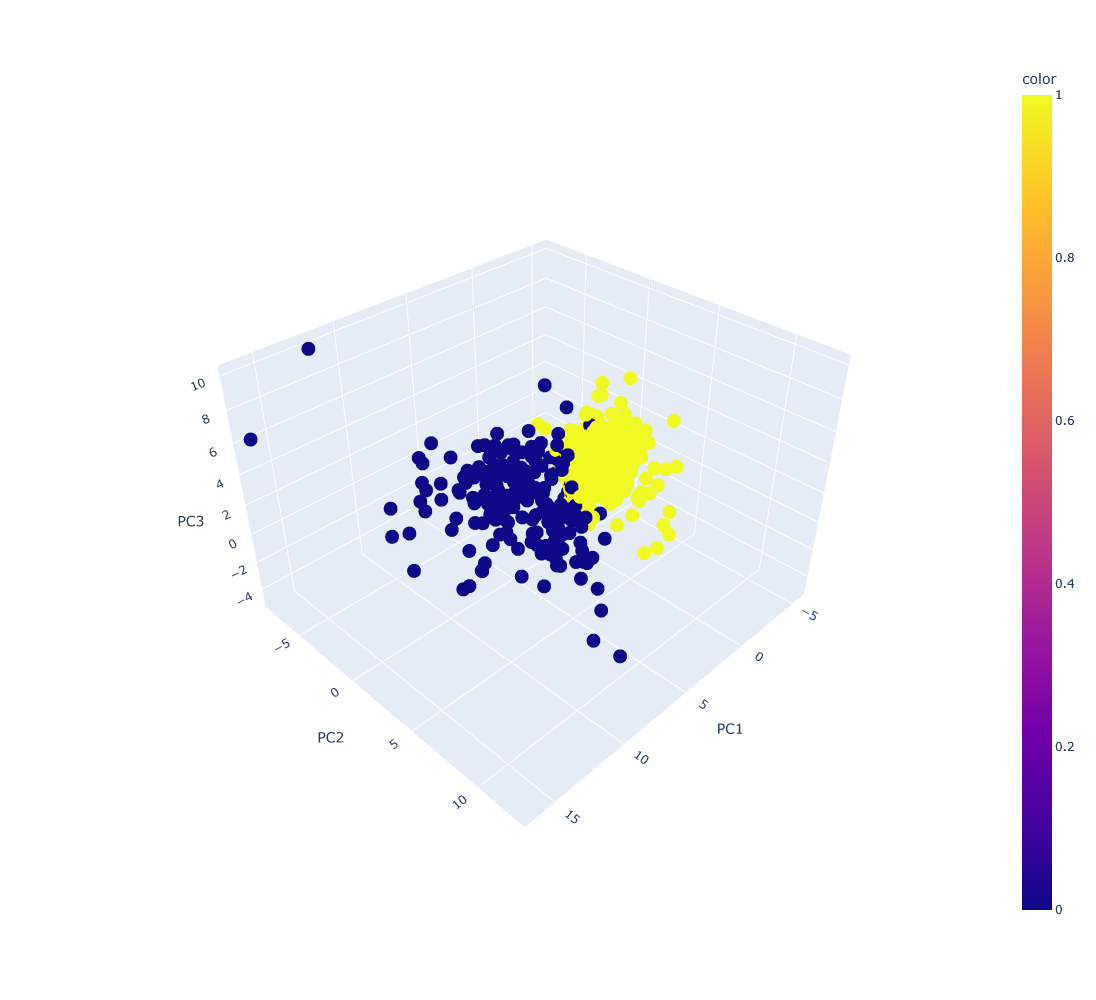

In [14]:
# 3D visualization of principal components
fig = px.scatter_3d(df_PCA, x='PC1', y='PC2', z='PC3', color=y, width=1000, height=1000)
fig.show()

# save the figure
fig.write_html('PCA_3D.html')

### Perform prediction based on principal components

In [15]:
# define models to test (for this comparison, default settings are used with every model)
seed = 101
log_model = LogisticRegression(random_state=seed)
SVC_model = SVC(random_state=seed)
KNN_model = KNeighborsClassifier()
GBC_model = GradientBoostingClassifier(random_state=seed)
DT_model = DecisionTreeClassifier(random_state=seed)
RF_model = RandomForestClassifier(random_state=seed)
NB_model = GaussianNB()

- PCA with 6 principal components

In [16]:
# define a model with 6 components
PCA_model = PCA(n_components=6, random_state=101)

# fit the model
princ_components = PCA_model.fit_transform(X_sc)

# create a df with the results
df_PCA = pd.DataFrame(princ_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [17]:
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,3.633733,-1.195112,1.411429
1,2.387802,-3.768172,-0.529293,1.118263,0.621777,0.028653
2,5.733896,-1.075174,-0.551747,0.912083,-0.177087,0.541453
3,7.122953,10.275589,-3.232789,0.152547,-2.960879,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226496


In [18]:
# variance explained by the different principal components
variances = PCA_model.explained_variance_ratio_

# print the results
variance_explained(variances)

Variance explained by the different principal components:
PC1: 44.27 %
PC2: 18.97 %
PC3: 9.39 %
PC4: 6.6 %
PC5: 5.5 %
PC6: 4.02 %

Total variance explained by the 6 principal components:
88.76 %


In [19]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(princ_components, y, test_size=0.3, random_state=101, shuffle=True)

In [20]:
# models to use
models = [log_model, SVC_model, KNN_model, DT_model, RF_model, GBC_model, NB_model]

# create a function for model evaluation
def eval_models(models, X_train, y_train):
    # metrics to use
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc']
    
    # empty dataframe for the evaluation scores
    global all_scores_df   # to make the df available outside the function
    all_scores_df = pd.DataFrame()
    
    # loop to do cross validation with all the models
    for m in models:
        scores = cross_validate(m, X_train, y_train, scoring=metrics, cv=5)   # cross-validation
        scores_df = pd.DataFrame(scores)   # creates a df with the results
        scores_df['model'] = str(m)   # adds the name of the model to the df
        all_scores_df = pd.concat([all_scores_df, scores_df], ignore_index=True)
    
    # drop the time columns since those are unnecessary
    all_scores_df = all_scores_df.drop(['fit_time', 'score_time'], axis=1)
    
    # calculate the mean of the scores
    mean_scores_df = all_scores_df.groupby('model').mean()
    
    # calculate standard deviation for the scores and rename columns
    std_scores_df = all_scores_df.groupby('model').std()
    std_scores_df.rename(columns={'test_accuracy':'test_accuracy_std', 'test_precision':'test_precision_std', 
                                  'test_recall':'test_recall_std', 'test_roc_auc':'test_roc_auc_std'}, inplace=True)
    
    # join the two dataframes (mean scores and standard deviation)
    global final_scores_df   # to make the df available outside the function
    final_scores_df = mean_scores_df.merge(std_scores_df, how='inner', left_on='model', right_on='model')

# test the different models
eval_models(models, X_train, y_train)

In [21]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.937278,0.945674,0.956471,0.930304,0.029148,0.027951,0.029220,0.032312
GaussianNB(),0.937310,0.935660,0.968392,0.983624,0.031715,0.032875,0.022376,0.009791
GradientBoostingClassifier(random_state=101),0.962373,0.965861,0.976157,0.988374,0.029248,0.035397,0.021768,0.015635
KNeighborsClassifier(),0.964937,0.959114,0.988157,0.984335,0.032331,0.040383,0.010812,0.014496
LogisticRegression(random_state=101),0.967373,0.970140,0.980157,0.997555,0.020908,0.034332,0.019806,0.002365
RandomForestClassifier(random_state=101),0.954842,0.958447,0.972157,0.987501,0.025826,0.035363,0.026747,0.014271
SVC(random_state=101),0.969905,0.977264,0.976235,0.997022,0.020865,0.030359,0.016572,0.003225


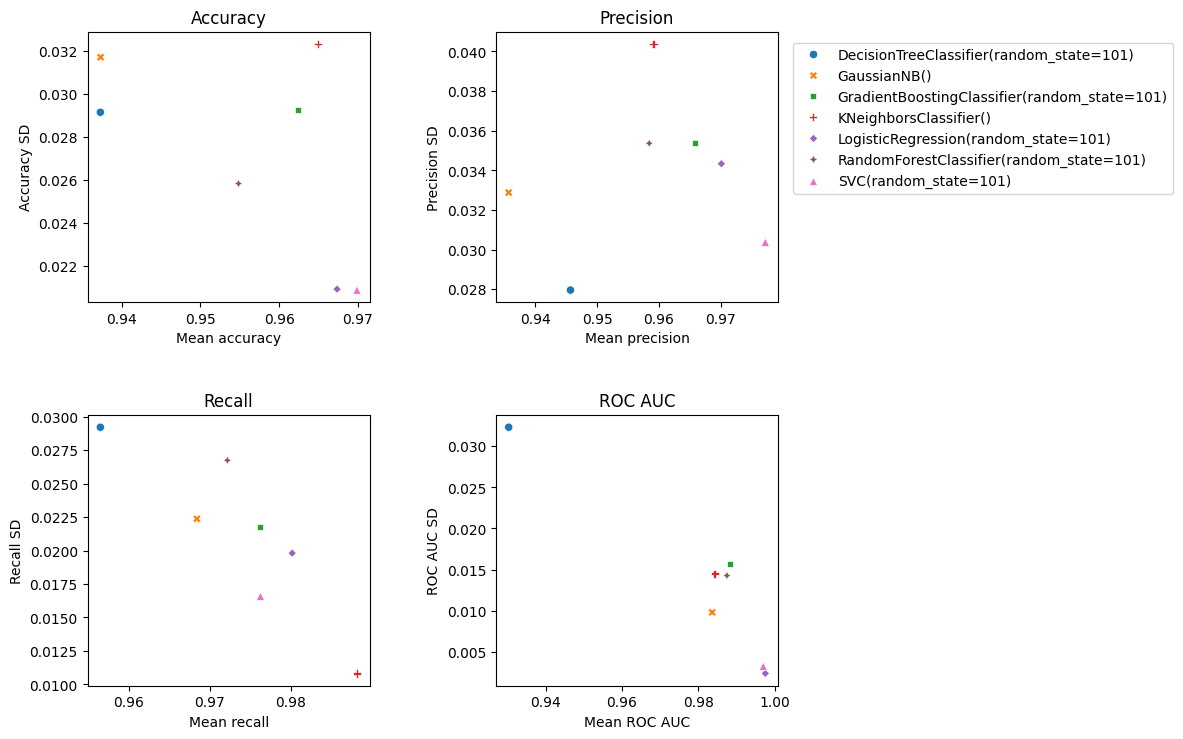

In [23]:
# create a function to plot the results
def plot_results(final_scores_df):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,8.5))
    fig.tight_layout(pad=6)
    
    # accuracy
    sns.scatterplot(data=final_scores_df, x='test_accuracy', y='test_accuracy_std', 
                    hue='model', style='model', ax=ax[0][0])
    ax[0][0].set_title('Accuracy')
    ax[0][0].set_xlabel('Mean accuracy')
    ax[0][0].set_ylabel('Accuracy SD')
    ax[0][0].legend(loc=(2.5, 0.4))
    
    # precision
    sns.scatterplot(data=final_scores_df, x='test_precision', y='test_precision_std', 
                    hue='model', style='model', ax=ax[0][1], legend=False)
    ax[0][1].set_title('Precision')
    ax[0][1].set_xlabel('Mean precision')
    ax[0][1].set_ylabel('Precision SD')
    
    # recall
    sns.scatterplot(data=final_scores_df, x='test_recall', y='test_recall_std', 
                    hue='model', style='model', ax=ax[1][0], legend=False)
    ax[1][0].set_title('Recall')
    ax[1][0].set_xlabel('Mean recall')
    ax[1][0].set_ylabel('Recall SD')
    
    # ROC AUC
    sns.scatterplot(data=final_scores_df, x='test_roc_auc', y='test_roc_auc_std', 
                    hue='model', style='model', ax=ax[1][1], legend=False)
    ax[1][1].set_title('ROC AUC')
    ax[1][1].set_xlabel('Mean ROC AUC')
    ax[1][1].set_ylabel('ROC AUC SD')

# plot the results to compare the performance of different classifiers
plot_results(final_scores_df)

# save the figure
plt.savefig('PCA_eval_6PCs.jpg', bbox_inches='tight')

<br>

- PCA with 5 principal components

In [24]:
# define a model with 5 components
PCA_model = PCA(n_components=5, random_state=101)

# fit the model
princ_components = PCA_model.fit_transform(X_sc)

# create a df with the results
df_PCA = pd.DataFrame(princ_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [25]:
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123165,3.633734,-1.195107
1,2.387802,-3.768172,-0.529295,1.118259,0.621771
2,5.733896,-1.075174,-0.551747,0.912084,-0.177085
3,7.122953,10.275589,-3.232790,0.152546,-2.960879
4,3.935302,-1.948072,1.389766,2.940638,0.546746


In [26]:
# variance explained by the different principal components
variances = PCA_model.explained_variance_ratio_

# print the results
variance_explained(variances)

Variance explained by the different principal components:
PC1: 44.27 %
PC2: 18.97 %
PC3: 9.39 %
PC4: 6.6 %
PC5: 5.5 %

Total variance explained by the 5 principal components:
84.73 %


In [27]:
feature_importances = pd.DataFrame(PCA_model.components_, 
                                   index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], 
                                   columns=X.columns).T   # transform the df for better readability

In [28]:
feature_importances

,PC1,PC2,PC3,PC4,PC5
mean radius,0.218902,-0.233857,-0.008531,0.041409,0.037786
mean texture,0.103725,-0.059706,0.064550,-0.603050,-0.049469
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,0.037375
mean area,0.220995,-0.231077,0.028700,0.053434,0.010331
mean smoothness,0.142590,0.186113,-0.104292,0.159383,-0.365089
mean compactness,0.239285,0.151892,-0.074092,0.031795,0.011704
mean concavity,0.258400,0.060165,0.002734,0.019123,0.086375
mean concave points,0.260854,-0.034768,-0.025564,0.065336,-0.043861
mean symmetry,0.138167,0.190349,-0.040240,0.067125,-0.305941
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,-0.044424


In [29]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(princ_components, y, test_size=0.3, random_state=101, shuffle=True)

In [30]:
# models to use
models = [log_model, SVC_model, KNN_model, DT_model, RF_model, GBC_model, NB_model]

# test the different models
eval_models(models, X_train, y_train)

In [31]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.942278,0.949520,0.960392,0.935713,0.018771,0.021285,0.024260,0.020899
GaussianNB(),0.932247,0.931642,0.964314,0.985779,0.027185,0.026799,0.025870,0.009961
GradientBoostingClassifier(random_state=101),0.962373,0.965861,0.976157,0.988239,0.029248,0.035397,0.021768,0.016684
KNeighborsClassifier(),0.969937,0.966204,0.988157,0.988204,0.027372,0.034704,0.010812,0.010556
LogisticRegression(random_state=101),0.972405,0.977533,0.980157,0.997693,0.016250,0.029790,0.019806,0.002461
RandomForestClassifier(random_state=101),0.962405,0.969547,0.972157,0.988992,0.031807,0.035794,0.026747,0.013278
SVC(random_state=101),0.969937,0.973264,0.980235,0.996886,0.020850,0.027827,0.013867,0.003464


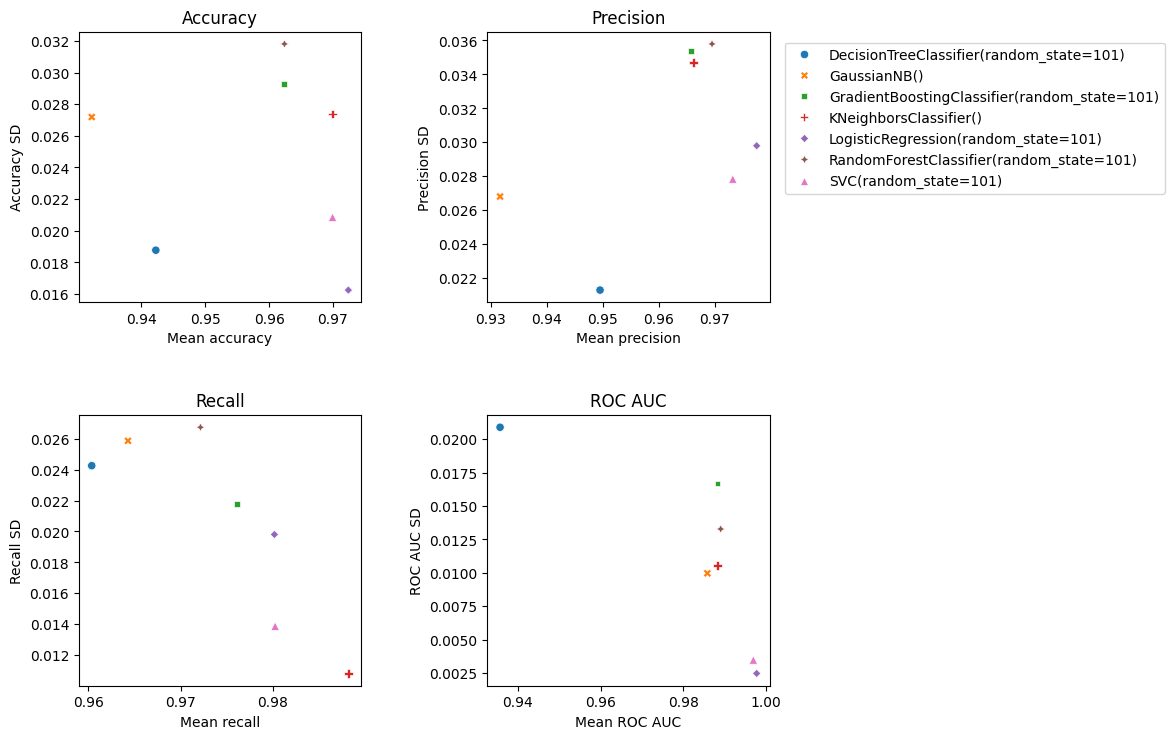

In [32]:
# plot the results to compare the performance of different classifiers
plot_results(final_scores_df)

# save the figure
plt.savefig('PCA_eval_5PCs.jpg', bbox_inches='tight', dpi=300)

<br>

- PCA with 4 principal components

In [33]:
# define a model with 4 components
PCA_model = PCA(n_components=4, random_state=101)

# fit the model
princ_components = PCA_model.fit_transform(X_sc)

# create a df with the results
df_PCA = pd.DataFrame(princ_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [34]:
df_PCA.head()

,PC1,PC2,PC3,PC4
0,9.192837,1.948583,-1.123165,3.633739
1,2.387802,-3.768172,-0.529294,1.118259
2,5.733896,-1.075174,-0.551748,0.912080
3,7.122953,10.275589,-3.232789,0.152548
4,3.935302,-1.948072,1.389766,2.940635


In [35]:
# variance explained by the different principal components
variances = PCA_model.explained_variance_ratio_

# print the results
variance_explained(variances)

Variance explained by the different principal components:
PC1: 44.27 %
PC2: 18.97 %
PC3: 9.39 %
PC4: 6.6 %

Total variance explained by the 4 principal components:
79.24 %


In [36]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(princ_components, y, test_size=0.3, random_state=101, shuffle=True)

In [37]:
# models to use
models = [log_model, SVC_model, KNN_model, DT_model, RF_model, GBC_model, NB_model]

# test the different models
eval_models(models, X_train, y_train)

In [38]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.937310,0.943554,0.960314,0.929237,0.035301,0.045254,0.031503,0.043307
GaussianNB(),0.927247,0.938130,0.948549,0.978166,0.028291,0.028907,0.029898,0.017307
GradientBoostingClassifier(random_state=101),0.959842,0.969342,0.968157,0.989798,0.020565,0.028091,0.030410,0.008902
KNeighborsClassifier(),0.952342,0.962044,0.964314,0.985313,0.018381,0.033753,0.025870,0.012446
LogisticRegression(random_state=101),0.962373,0.966863,0.976235,0.996329,0.026480,0.041253,0.025673,0.003500
RandomForestClassifier(random_state=101),0.957373,0.966568,0.968235,0.986411,0.027322,0.042107,0.022789,0.014389
SVC(random_state=101),0.957373,0.969730,0.964392,0.994712,0.025853,0.035006,0.032390,0.003866


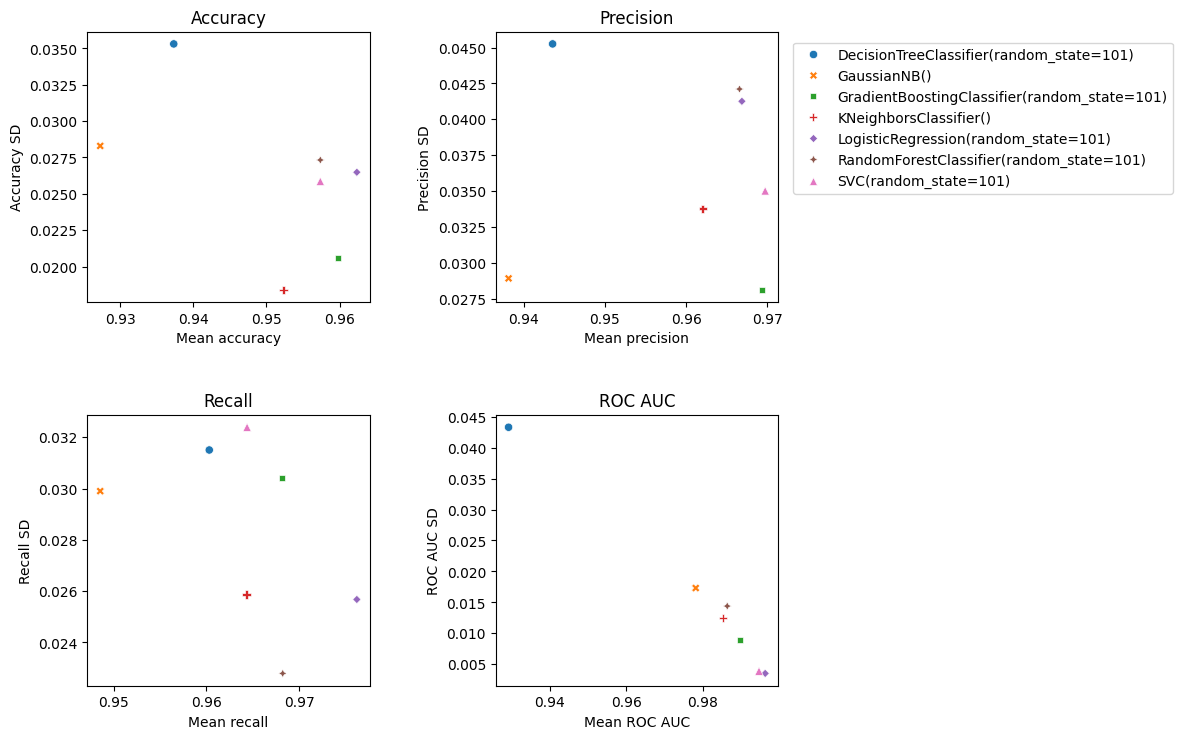

In [39]:
# plot the results to compare the performance of different classifiers
plot_results(final_scores_df)

# save the figure
plt.savefig('PCA_eval_4PCs.jpg', bbox_inches='tight', dpi=300)